In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 479, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 479 (delta 70), reused 63 (delta 30), pack-reused 324
Receiving objects: 100% (479/479), 12.44 MiB | 13.05 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [3]:
!pip install wordcloud

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep="\t", names = ['label','text']) # sep="\t" it means the data is in tab seperated value
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.shape

(5572, 2)

## DATA CLEANING

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
sn = SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [9]:
def  clean_text(sms):
  sms = sms.lower()
  sms = re.sub("[^a-z]",' ',sms)
  sms = nltk.word_tokenize(sms)
  sms = [t for t in sms if len(t)>1]
  sms = [sn.stem(word) for word in sms if word not in stop]
  sms = ' '.join(sms)
  return sms

In [10]:
clean_text("GET c c c this tickets buyings @#$^&for Free! wow")

'get ticket buy free wow'

In [11]:
df['clean_text'] = df['text'].apply(clean_text)
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


## wordcloud

In [12]:
from wordcloud import WordCloud

In [13]:
hamdata = df[df['label'] == 'ham']
hamdata = hamdata['clean_text']
hamdata

0       go jurong point crazi avail bugi great world l...
1                                     ok lar joke wif oni
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                  go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean_text, Length: 4825, dtype: object

In [14]:
def wordCloud(data):
  words= ' '.join(data)
  wc = WordCloud(background_color='white')
  wc = wc.generate(words)

  plt.figure(figsize=(10,8))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

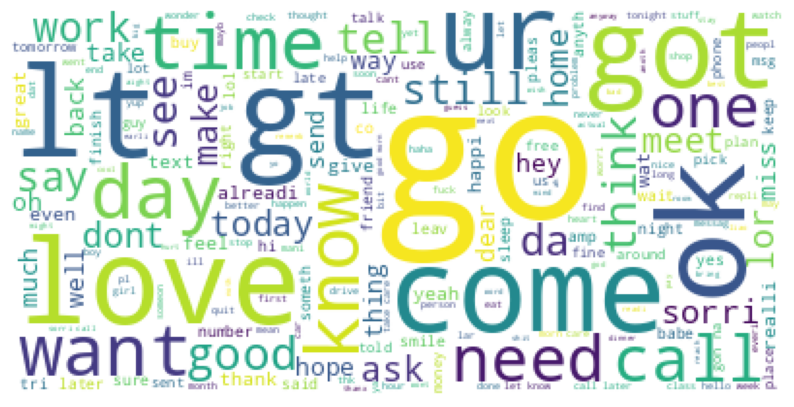

In [15]:
wordCloud(hamdata)

In [16]:
spamdata = df[df['label'] == 'spam']
spamdata = spamdata['clean_text']

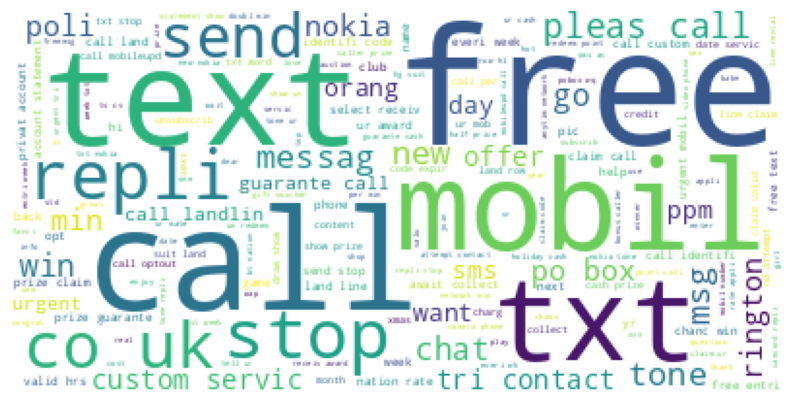

In [17]:
wordCloud(spamdata)

# featurization

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer(max_features = 5000)

In [20]:
X = cv.fit_transform(df['clean_text']).toarray()

In [21]:
X.shape

(5572, 5000)

In [22]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
y = pd.get_dummies(df['label'])
y = y['spam'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Modelbuilding

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
model = MultinomialNB()

In [28]:
model.fit(X_train,y_train)

MultinomialNB()

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_test,y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [32]:
pd.DataFrame({'Actual' : y_test, 'predicted' : y_pred}).head(10)

,Actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


# Evaluation

In [33]:
print("Accuracy on training data :")
print(model.score(X_train,y_train))

Accuracy on training data :
0.990892043932494


In [34]:
print("Accuracy on testing data :")
print(model.score(X_test,y_test))

Accuracy on testing data :
0.9847743338771071
